# Calculating the Separations of Matches
Notebook where I measure the separation in the sources I have from the HSC and the COSMOS catalogue. I will also look at the separation between those and the AGN catalogues.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
orig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'


In [54]:
df_cat = pd.read_csv(f'{data_folder}/cosmos-primary-data.csv', index_col = 0).reset_index().rename(columns = {'index' : 'ORyanID_23'})

In [76]:
agn_cat = pd.read_csv(f'{combine_fold}/source-agn-cat.csv', index_col = 0)

In [56]:
or_sample = pd.read_csv(f'{orig_folder}/interacting-catalogue.csv', index_col = 0)

## Separations Between COSMOS and OR23

In [57]:
df_cat

,ORyanID_23,ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,5.535906,...,-8.931825e+00,-8.911355e+00,-8.899668e+00,-8.883307e+00,-8.872990e+00,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705532984,857121,150.673667,2.226291,9348.870117,22451.160156,0.000002,0.000004,1.265998e-08,8.876858,...,-1.102382e+01,-1.082684e+01,-1.061214e+01,-1.008995e+01,-9.884142e+00,0.342150,0.435647,0.632192,0.834451,0.937351
2,4000705533312,873195,150.668102,2.242849,9482.499023,22848.505859,0.000007,0.000002,1.829277e-06,5.542504,...,-1.036331e+01,-1.018712e+01,-1.005083e+01,-9.911050e+00,-9.815660e+00,1.108623,1.258513,1.362733,1.408040,1.445569
3,4000705533383,861738,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,1.332813e-05,5.169795,...,-9.574272e+00,-9.548649e+00,-9.503962e+00,-9.439343e+00,-9.384205e+00,0.240042,0.281559,0.330791,0.384371,0.436491
4,4000705539529,1284864,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,1.244353e-06,6.412690,...,-9.669377e+00,-9.614943e+00,-9.570104e+00,-9.533121e+00,-9.476167e+00,0.094187,0.114436,0.140990,0.159430,0.183608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,6000535064806,1041748,150.435644,2.404769,15058.375977,26733.025391,0.000284,0.000249,1.584763e-05,3.683371,...,-8.715841e+00,-8.601144e+00,-8.466426e+00,-8.338096e+00,-8.265055e+00,0.216840,0.269234,0.351659,0.400523,0.462082
3782,6000535121007,997393,149.712229,2.359027,32405.687500,25635.718750,0.000051,0.000031,8.479790e-06,9.109251,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,NaN,NaN,NaN,NaN,NaN
3783,6000535781610,1231637,150.428931,2.588176,15220.276367,31134.923828,0.000496,0.000437,-8.376359e-05,3.791407,...,-9.657442e+00,-9.606500e+00,-9.499937e+00,-9.339849e+00,-9.242270e+00,0.021844,0.021844,0.062948,0.119779,0.160169
3784,6000535864481,1042682,150.505365,2.407106,13386.495117,26789.533203,0.011980,0.011985,-7.998707e-07,4.652697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
or_sample.head()

,SourceID,RA,Dec,int_prediction,references,status
0,4000704963129,187.983807,58.010524,0.958096,No_entry,Unreferenced
1,4000704963271,187.980323,58.026481,0.966350,No_entry,Unreferenced
2,4000704963422,187.938181,58.039949,0.956150,No_entry,Unreferenced
3,4000705131622,217.216271,34.015278,0.987888,No_entry,Unreferenced
4,4000705131630,217.207839,34.015576,0.984174,No_entry,Unreferenced


In [59]:
df_merged = (
    df_cat[['ORyanID_23', 'ID', 'ALPHA_J2000','DELTA_J2000']]
    .merge(or_sample.rename(columns = {'SourceID':'ORyanID_23'}), on = 'ORyanID_23', how = 'left')
    .dropna()
)

In [60]:
df_merged

,ORyanID_23,ID,ALPHA_J2000,DELTA_J2000,RA,Dec,int_prediction,references,status
0,4000705532455,816891,150.679846,2.196543,150.679664,2.196615,0.970096,['2007ApJS..172...99C'],Referenced
1,4000705532984,857121,150.673667,2.226291,150.673546,2.226438,0.961160,['2007ApJS..172...99C'],Referenced
2,4000705533312,873195,150.668102,2.242849,150.667975,2.242945,0.995066,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
3,4000705533383,861738,150.645118,2.237538,150.645125,2.237650,0.985773,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
4,4000705539529,1284864,149.686223,2.637412,149.686626,2.637161,0.992917,"['2009ApJS..184..218L', '2007ApJS..172...99C']",Referenced
...,...,...,...,...,...,...,...,...,...
3781,6000535064806,1041748,150.435644,2.404769,150.436605,2.402720,0.964138,"['2007ApJS..172...99C', '2007ApJS..172...99C']",Referenced
3782,6000535121007,997393,149.712229,2.359027,149.712666,2.358926,0.984786,"['2009ApJS..184..218L', '2009ApJS..184..218L']",Referenced
3783,6000535781610,1231637,150.428931,2.588176,150.429020,2.585777,0.994921,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
3784,6000535864481,1042682,150.505365,2.407106,150.506084,2.405783,0.990552,"['2007ApJS..172...99C', '2007ApJS..172...99C']",Referenced


In [61]:
df_red = (
    df_merged
    [['ORyanID_23', 'ID', 'ALPHA_J2000', 'DELTA_J2000', 'RA', 'Dec']]
)

In [62]:
df_coords = (
    df_red
    .assign(cosmos_coords = df_red.apply(lambda row: SkyCoord(ra = row.ALPHA_J2000 * u.deg, dec = row.DELTA_J2000 * u.deg, frame = 'icrs'), axis = 1))
    .assign(or_coords = df_red.apply(lambda row: SkyCoord(ra = row.RA * u.deg, dec = row.Dec * u.deg, frame = 'icrs'), axis = 1))
)

In [63]:
df_seps = (
    df_coords
    .assign(seps = df_coords.apply(lambda row: (row.cosmos_coords).separation(row.or_coords).to(u.arcsec).value, axis = 1))
)

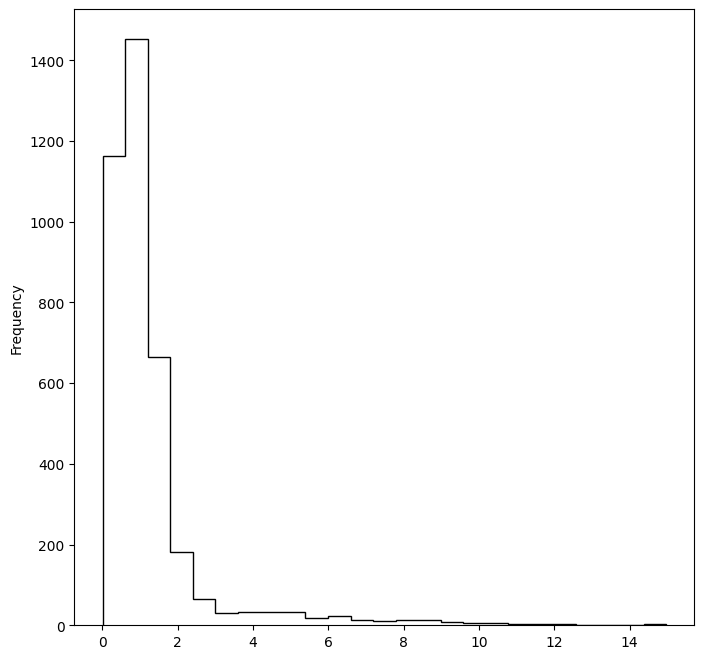

In [69]:
df_seps.seps.plot.hist(
    bins = 25,
    figsize = (8,8),
    histtype = 'step',
    color = 'black'
)
plt.show()

In [113]:
df_rem = df_seps.query('seps <= 3')

## Checking Loss from Catalogue

In [114]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)[['ORyanID_23']]

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [115]:
len(df_rem)

3530

In [116]:
df_tmp = (
    df_cat.assign(tmp = df_cat.ORyanID_23.apply(lambda x: 'n' if '_extra' not in str(x) else 'y'))
)
df_cat_red = df_tmp.query('tmp == "n"')

In [117]:
df_cat_red

,ORyanID_23,tmp
0,4000705532455,n
1,4000705533383,n
2,4000705539941,n
3,4000705540034,n
4,4000705540064,n
...,...,...
3341,4001024667582,n
3342,4001051778929,n
3343,4001111524196,n
3344,4001185627710,n


In [118]:
df_cat_red.merge(df_rem, on = 'ORyanID_23', how = 'left').dropna()

,ORyanID_23,tmp,ID,ALPHA_J2000,DELTA_J2000,RA,Dec,cosmos_coords,or_coords,seps
0,4000705532455,n,816891.0,150.679846,2.196543,150.679664,2.196615,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.6...","<SkyCoord (ICRS): (ra, dec) in deg\n (150.6...",0.705448
1,4000705533383,n,861738.0,150.645118,2.237538,150.645125,2.237650,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.6...","<SkyCoord (ICRS): (ra, dec) in deg\n (150.6...",0.405555
2,4000705539941,n,1301188.0,149.702462,2.654895,149.702652,2.654624,"<SkyCoord (ICRS): (ra, dec) in deg\n (149.7...","<SkyCoord (ICRS): (ra, dec) in deg\n (149.7...",1.193831
3,4000705540034,n,1304538.0,149.726828,2.658172,149.727017,2.658066,"<SkyCoord (ICRS): (ra, dec) in deg\n (149.7...","<SkyCoord (ICRS): (ra, dec) in deg\n (149.7...",0.777141
4,4000705540064,n,1310001.0,149.701230,2.660343,149.701495,2.660271,"<SkyCoord (ICRS): (ra, dec) in deg\n (149.7...","<SkyCoord (ICRS): (ra, dec) in deg\n (149.7...",0.987972
...,...,...,...,...,...,...,...,...,...,...
3067,4000854480186,n,917450.0,150.043229,2.289116,150.043148,2.289185,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.0...","<SkyCoord (ICRS): (ra, dec) in deg\n (150.0...",0.385336
3068,4000858402222,n,1449463.0,150.309534,2.800553,150.309690,2.800710,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.3...","<SkyCoord (ICRS): (ra, dec) in deg\n (150.3...",0.795439
3069,4000859156914,n,791176.0,149.654031,2.172352,149.653857,2.172251,"<SkyCoord (ICRS): (ra, dec) in deg\n (149.6...","<SkyCoord (ICRS): (ra, dec) in deg\n (149.6...",0.727218
3070,4000859744431,n,1395057.0,150.235280,2.746598,150.235380,2.746410,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.2...","<SkyCoord (ICRS): (ra, dec) in deg\n (150.2...",0.768530


## Looking at AGN

Nm, doing this in the original code.